In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('kc_house_data.csv')

<b>Question 1)</b> 
Display the data types of each column using the attribute dtypes, then take a screenshot and submit it, include your code in the image.

In [3]:
print('Column             Dtype\n------------------------')
data.dtypes

Column             Dtype
------------------------


id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

Because in this data there's not 'Unnamed: 0' column, I only dropping 'id' column

<b>Question 2)</b> Drop the columns "id" and "Unnamed: 0" from axis 1 using the method drop(), then use the method describe() to obtain a statistical summary of the data. Take a screenshot and submit it, make sure the inplace parameter is set to True. Your output should look like this:

In [4]:
data.drop('id', axis=1, inplace=True)

In [5]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


<b>Question 3)</b> use the method value_counts to count the number of houses with unique floor values, use the method .to_frame() to convert it to a dataframe. Your output should look like this :

In [6]:
data['floors'].value_counts().to_frame()

,floors
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


<b>Question 4)</b> use the function boxplot in the seaborn library to produce a plot that can be used to determine whether houses with a waterfront view or without a waterfront view have more price outliers. Your output should look like this with the code that produced it (the colors may be different ) :

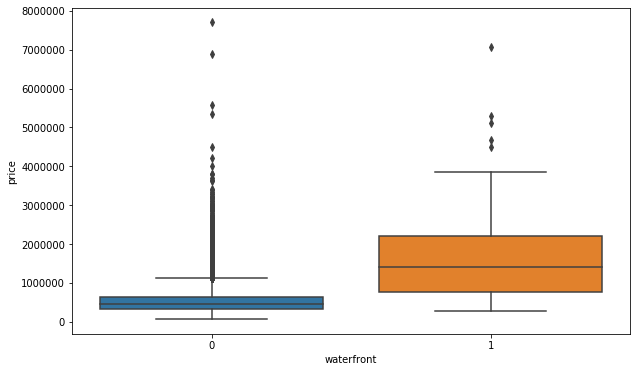

In [7]:
_, ax = plt.subplots(1,1,figsize=(10,6))
sns.boxplot(x='waterfront', y='price', data=data, ax=ax)
plt.show()

<b>Question 5) </b> Use the function regplot in the seaborn library to determine if the feature sqft_above is negatively or positively correlated with price. Take a screenshot of the plot and the code used to generate it.

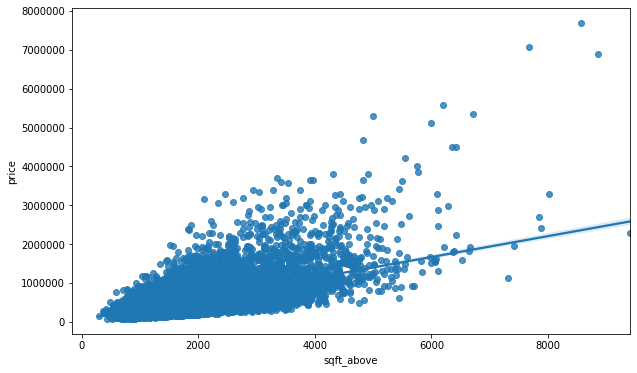

In [8]:
_, ax = plt.subplots(1,1,figsize=(10,6))
sns.regplot(x='sqft_above', y='price', data=data, ax=ax)
plt.show()

In [9]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

<b>Question 6)</b> Fit a linear regression model to predict the price using the feature 'sqft_living' then calculate the R^2. Take a screenshot of your code and the value of the R^2. 

In [10]:
linreg = LinearRegression()
linreg.fit(data[['sqft_living']].values, data['price'].values)
r2 = linreg.score(data[['sqft_living']].values, data['price'].values)

print('R^2 :', r2)

R^2 : 0.49285321790379316


<b>Question 7)</b> Fit a linear regression model to predict the 'price' using the list of features:

- "floors"
- "waterfront"
- "lat"
- "bedrooms"
- "sqft_basement"
- "view"
- "bathrooms"
- "sqft_living15"
- "sqft_above"
- "grade"
- "sqft_living"
The calculate the R^2. Take a screenshot of your code and the value of the R^2

In [11]:
feature_columns = ["floors", 
                     "waterfront", 
                     "lat", 
                     "bedrooms", 
                     "sqft_basement", 
                     "view", 
                     "bathrooms", 
                     "sqft_living15", 
                     "sqft_above", 
                     "grade", 
                     "sqft_living"]

linreg2 = LinearRegression()
linreg2.fit(data[feature_columns].values, data['price'].values)
r2 = linreg2.score(data[feature_columns].values, data['price'].values)

print('R^2 :', r2)

R^2 : 0.6577157948530856


<b>Question 8)</b> Create a pipeline object that scales the data performs a polynomial transform and fits a linear regression model. Fit the object using the features in the question above, then fit the model and calculate the R^2. Take a screenshot of your code and the R^2.

In [12]:
scaler = StandardScaler()
polynomial = PolynomialFeatures(include_bias=False)
linreg3 = LinearRegression()

Input = [('scaler',scaler), ('polynomial', polynomial), ('linreg', linreg3)]
pipeline = Pipeline(Input)

In [13]:
pipeline.fit(data[feature_columns].values, data['price'].values)
r2 = pipeline.score(data[feature_columns].values, data['price'].values)

print('R^2 :', r2)

R^2 : 0.7512807745333926


<b>Question 9)</b> Create and fit a Ridge regression object using the training data, setting the regularization parameter to 0.1 and calculate the R^2 using the test data. Take a screenshot for your code and the R^2

In [14]:
X_train, X_test, y_train, y_test = train_test_split(data[feature_columns].values, data['price'].values, test_size=0.15, random_state=1234)

In [15]:
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)
ridge_R2 = ridge.score(X_test, y_test)

print('R^2 :', ridge_R2)

R^2 : 0.676424975494023


<b>Question 10)</b> Perform a second order polynomial transform on both the training data and testing data. Create and fit a Ridge regression object using the training data, setting the regularisation parameter to 0.1. Calculate the R^2 utilising the test data provided. Take a screenshot of your code and the R^2.

In [16]:
poly_train = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X_train)
poly_test = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X_test)

In [17]:
ridge2 = Ridge(alpha=0.1)
ridge2.fit(poly_train, y_train)
ridge_R2 = ridge2.score(poly_test, y_test)

print('R^2 :', ridge_R2)

R^2 : 0.7500735444822272
